* refs https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

# 1. Warm-up: numpy

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import torch

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = 12, 7

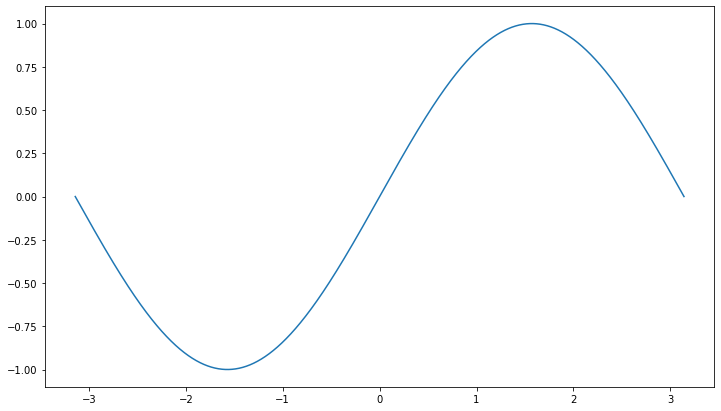

In [3]:
# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

fig = plt.plot(x, y)

In [4]:
# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6

In [5]:
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

99 138.57423775628814
199 100.22528363232054
299 73.22852640161406
399 54.21696989221435
499 40.82473347796497
599 31.388242525350353
699 24.737304200219654
799 20.04848360508225
899 16.742152975641964
999 14.41017252413316
1099 12.765066861998772
1199 11.604293151347065
1299 10.785109825045412
1399 10.206894501735553
1499 9.798698744003445
1599 9.510485804293973
1699 9.306959519116223
1799 9.163216833303853
1899 9.061684206729169
1999 8.989958190368892


In [7]:
print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

Result: y = -0.019221633565937913 + 0.8320018859090547 x + 0.0033160516394874313 x^2 + -0.0898114878126504 x^3


In [8]:
y_pred = a + b * x + c * x ** 2 + d * x ** 3

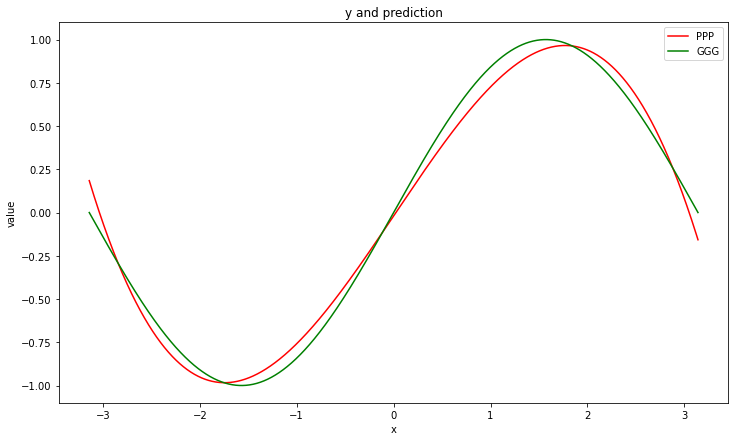

In [16]:
plt.plot(x, y_pred, color='r', label='PPP')
plt.plot(x, y, color='g', label='GGG')
plt.xlabel("x")
plt.ylabel('value')
plt.title('y and prediction')
plt.legend()
plt.show()

# 2. PyTorch: Tensors

* https://medium.com/@anoorasfatima/10-most-common-maths-operation-with-pytorchs-tensor-70a491d8cafd
* A PyTorch Tensor is conceptually identical to a numpy array: a Tensor is an n-dimensional array, and PyTorch provides many functions for operating on these Tensors. Behind the scenes, Tensors can keep track of a computational graph and gradients, but they’re also useful as a generic tool for scientific computing.

* Also unlike numpy, PyTorch Tensors can utilize GPUs to accelerate their numeric computations. To run a PyTorch Tensor on GPU, you simply need to specify the correct device.


import torch

In [41]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU
print(f"type(dtype): {type(dtype)}")
print(f"type(device: {type(device)})")

type(dtype): <class 'torch.dtype'>
type(device: <class 'torch.device'>)


In [42]:
# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

* shape or size()

In [72]:
e = torch.randn(())
print(e, e.shape)
print(e.numpy().shape)
e = torch.randn(1)
print(e, e.shape)
print(e.numpy().shape)
print(np.array(1).shape)
print(np.array([1]).shape)

tensor(0.8881) torch.Size([])
()
tensor([1.7502]) torch.Size([1])
(1,)
()
(1,)


In [43]:
learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
#     loss = (y_pred - y).pow(2).sum().item()
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

99 tensor(433.4680)
199 tensor(295.7434)
299 tensor(202.8835)
399 tensor(140.2121)
499 tensor(97.8738)
599 tensor(69.2426)
699 tensor(49.8611)
799 tensor(36.7270)
899 tensor(27.8172)
999 tensor(21.7663)
1099 tensor(17.6525)
1199 tensor(14.8525)
1299 tensor(12.9446)
1399 tensor(11.6431)
1499 tensor(10.7542)
1599 tensor(10.1464)
1699 tensor(9.7304)
1799 tensor(9.4453)
1899 tensor(9.2496)
1999 tensor(9.1153)


In [32]:
print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

Result: y = -2.836569728970062e-05 + 0.8567265868186951 x + 4.8926826821116265e-06 x^2 + -0.09332836419343948 x^3


In [33]:
print(f"type(x)={type(x)}")
print(f"type(y)={type(y)}")

type(x)=<class 'torch.Tensor'>
type(y)=<class 'torch.Tensor'>


* matplotlib.pyplot can get data from tensor

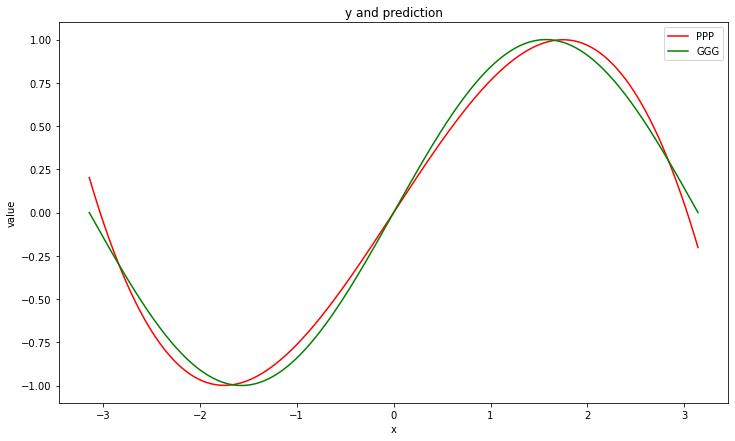

In [34]:
plt.plot(x, y_pred, color='r', label='PPP')
plt.plot(x, y, color='g', label='GGG')
plt.xlabel("x")
plt.ylabel('value')
plt.title('y and prediction')
plt.legend()
plt.show()

# 3. PyTorch: Tensors and autograd

* Thankfully, we can use automatic differentiation to automate the computation of backward passes in neural networks.

In [6]:

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

* Setting requires_grad=True

In [7]:
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

In [8]:
learning_rate = 1e-6
for t in range(2000):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    loss = (y_pred - y).pow(2).sum()

    if t % 100 == 99:
#         print(t, loss.item())
        print(y_pred.shape, t, loss)

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

torch.Size([2000]) 99 tensor(75.4000, grad_fn=<SumBackward0>)
torch.Size([2000]) 199 tensor(55.9204, grad_fn=<SumBackward0>)
torch.Size([2000]) 299 tensor(42.1413, grad_fn=<SumBackward0>)
torch.Size([2000]) 399 tensor(32.3935, grad_fn=<SumBackward0>)
torch.Size([2000]) 499 tensor(25.4973, grad_fn=<SumBackward0>)
torch.Size([2000]) 599 tensor(20.6184, grad_fn=<SumBackward0>)
torch.Size([2000]) 699 tensor(17.1667, grad_fn=<SumBackward0>)
torch.Size([2000]) 799 tensor(14.7247, grad_fn=<SumBackward0>)
torch.Size([2000]) 899 tensor(12.9969, grad_fn=<SumBackward0>)
torch.Size([2000]) 999 tensor(11.7745, grad_fn=<SumBackward0>)
torch.Size([2000]) 1099 tensor(10.9096, grad_fn=<SumBackward0>)
torch.Size([2000]) 1199 tensor(10.2977, grad_fn=<SumBackward0>)
torch.Size([2000]) 1299 tensor(9.8647, grad_fn=<SumBackward0>)
torch.Size([2000]) 1399 tensor(9.5584, grad_fn=<SumBackward0>)
torch.Size([2000]) 1499 tensor(9.3416, grad_fn=<SumBackward0>)
torch.Size([2000]) 1599 tensor(9.1883, grad_fn=<SumBac

In [9]:
print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

Result: y = -0.010203349404036999 + 0.8570622205734253 x + 0.0017602473963052034 x^2 + -0.09337610006332397 x^3


In [16]:
print(f"type(a.item()) = {type(a.item())}")
print(f"type(y_pred) = {type(y_pred)},\ntype(y_pred.detach())={y_pred.detach()}")

type(a.item()) = <class 'float'>
type(y_pred) = <class 'torch.Tensor'>,
type(y_pred.detach())=tensor([ 0.2099,  0.2039,  0.1979,  ..., -0.1836, -0.1896, -0.1955])


* detach: Returns a new Tensor, detached from the current graph.

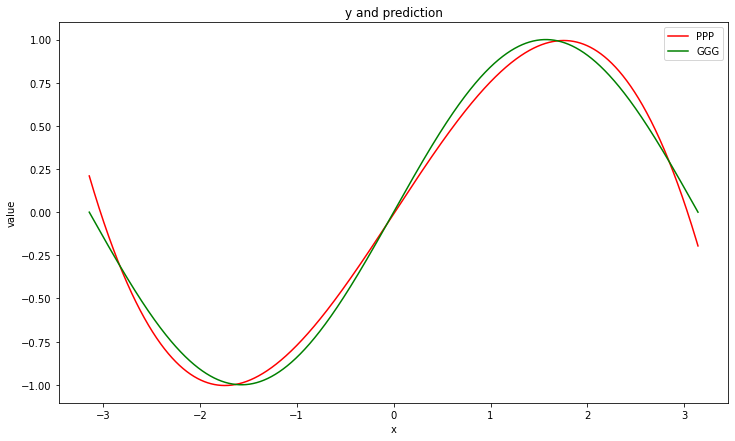

In [13]:
y_hat = y_pred.detach()
# y_hat = y_pred       # it does not work
# y_hat = y_pred.detach().numpy()
plt.plot(x, y_hat, color='r', label='PPP')
plt.plot(x, y, color='g', label='GGG')
plt.xlabel("x")
plt.ylabel('value')
plt.title('y and prediction')
plt.legend()
plt.show()

# 4. PyTorch: Defining new autograd functions

* Under the hood, each primitive autograd operator is really two functions that operate on Tensors. 
* The forward function computes output Tensors from input Tensors. 
* The backward function receives the gradient of the output Tensors with respect to some scalar value, and computes the gradient of the input Tensors with respect to that same scalar value.

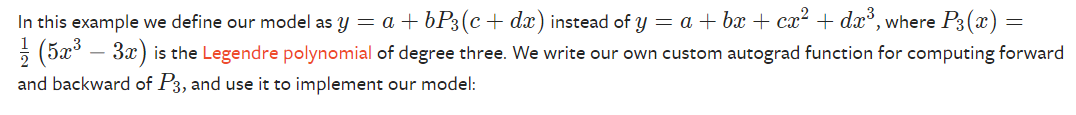

* ctx is a context object that can be used to stash information for backward computation
* In the backward pass we receive a Tensor (grad_output) containing the gradient of the loss with respect to the output
* <span class="girk">refer to: torch/autograd/function.py/class Function:: def backward(ctx: Any, *grad_outputs: Any) -> Any:</span>

In [78]:
class LegendrePolynomial3(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = ctx.saved_tensors
        return grad_output * 1.5 * (5 * input ** 2 - 1)

In [80]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

In [81]:
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

In [82]:
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

<div class="mark">
* To apply our Function, we use Function.apply method. We alias this as 'P3'.</div><i class="fa fa-lightbulb-o "></i>

In [87]:
learning_rate = 1e-6
for t in range(2000):
    # To apply our Function, we use Function.apply method. We alias this as 'P3'.
    P3 = LegendrePolynomial3.apply

    # Forward pass: compute predicted y using operations; we compute
    # P3 using our custom autograd operation.
    y_pred = a + b * P3(c + d * x)

    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
#         print(t, loss.item())
        print(y_pred.shape, t, loss)

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

torch.Size([2000]) 99 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 199 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 299 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 399 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 499 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 599 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 699 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 799 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 899 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 999 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 1099 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 1199 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 1299 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 1399 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 1499 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 1599 tensor(8.8172, grad_fn=<SumBackward0>)
tor

In [88]:
print(f'Result: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')

Result: y = -1.0856260335145862e-09 + -2.2337563037872314 * P3(-3.7009777464902527e-09 + 0.2556576728820801 x)


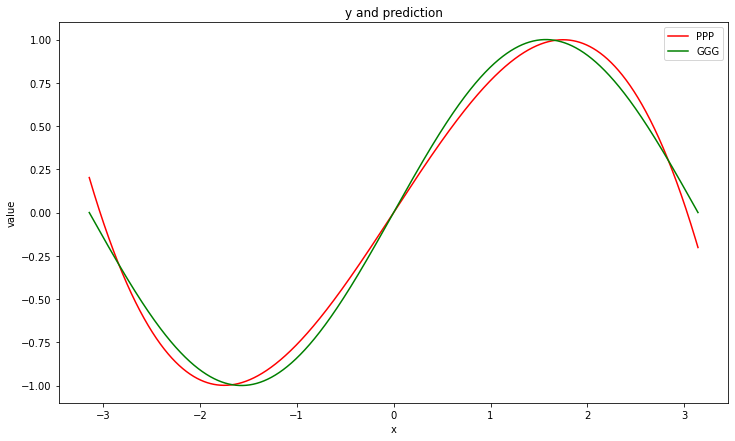

In [89]:
y_hat = y_pred.detach()
# y_hat = y_pred.detach().numpy()
plt.plot(x, y_hat, color='r', label='PPP')
plt.plot(x, y, color='g', label='GGG')
plt.xlabel("x")
plt.ylabel('value')
plt.title('y and prediction')
plt.legend()
plt.show()

# 5. PyTorch: nn

## 5.1. Prior knowledge 

### 5.1.1 Torch.unsqueeze

* TORCH.UNSQUEEZE

* torch.unsqueeze(input, dim) → Tensor
* https://pytorch.org/docs/1.9.0/generated/torch.unsqueeze.html#torch.unsqueeze

In [91]:
x = torch.Tensor([1, 2, 3, 4])
print(x, x.size())

tensor([1., 2., 3., 4.]) torch.Size([4])


In [92]:
print(torch.unsqueeze(x, 0))  
print(torch.unsqueeze(x, 0).size())  
print(torch.unsqueeze(x, 0).dim())  
print(torch.unsqueeze(x, 0).numpy()) 

tensor([[1., 2., 3., 4.]])
torch.Size([1, 4])
2
[[1. 2. 3. 4.]]


In [93]:
print(torch.unsqueeze(x, 1))  
print(torch.unsqueeze(x, 1).size())  
print(torch.unsqueeze(x, 1).dim())  
print(torch.unsqueeze(x, 1).numpy()) 

tensor([[1.],
        [2.],
        [3.],
        [4.]])
torch.Size([4, 1])
2
[[1.]
 [2.]
 [3.]
 [4.]]


In [94]:
print(torch.unsqueeze(x, -1))  
print(torch.unsqueeze(x, -1).size())  
print(torch.unsqueeze(x, -1).dim())  
print(torch.unsqueeze(x, -1).numpy()) 

tensor([[1.],
        [2.],
        [3.],
        [4.]])
torch.Size([4, 1])
2
[[1.]
 [2.]
 [3.]
 [4.]]


In [99]:
a = torch.randn(2,3,4)
print("(0)")
print(a,"\n",a.shape,"\n")

b = torch.squeeze(a)
print("(1)")
print(b,"\n",b.shape,"\n")

c = torch.squeeze(a,0)
print("(2)")
print(c,"\n",c.shape,"\n")

d = torch.squeeze(a,1)
print("(3)")
print(d,"\n",d.shape,"\n")

e = torch.squeeze(a,2)       #  !!!!! retain the raw
print("(4)")
print(e,"\n",e.shape,"\n")

(0)
tensor([[[ 0.9313, -0.3266,  0.0365, -0.1686],
         [-1.3693, -0.4047, -1.0487, -0.6092],
         [ 0.4194, -0.9643, -0.1379,  0.1962]],

        [[ 1.1074, -0.0605, -1.1605,  0.2535],
         [ 1.2359,  0.2080, -0.2623,  0.0530],
         [-0.7985, -0.8529, -0.6069,  0.6182]]]) 
 torch.Size([2, 3, 4]) 

(1)
tensor([[[ 0.9313, -0.3266,  0.0365, -0.1686],
         [-1.3693, -0.4047, -1.0487, -0.6092],
         [ 0.4194, -0.9643, -0.1379,  0.1962]],

        [[ 1.1074, -0.0605, -1.1605,  0.2535],
         [ 1.2359,  0.2080, -0.2623,  0.0530],
         [-0.7985, -0.8529, -0.6069,  0.6182]]]) 
 torch.Size([2, 3, 4]) 

(2)
tensor([[[ 0.9313, -0.3266,  0.0365, -0.1686],
         [-1.3693, -0.4047, -1.0487, -0.6092],
         [ 0.4194, -0.9643, -0.1379,  0.1962]],

        [[ 1.1074, -0.0605, -1.1605,  0.2535],
         [ 1.2359,  0.2080, -0.2623,  0.0530],
         [-0.7985, -0.8529, -0.6069,  0.6182]]]) 
 torch.Size([2, 3, 4]) 

(3)
tensor([[[ 0.9313, -0.3266,  0.0365, -0.1686],
 

In [101]:
a = torch.randn(1,3)
print(a,"\n",a.shape,"\n")

b = torch.unsqueeze(a,0)
print(b,"\n",b.shape,"\n")

c = torch.unsqueeze(a,1)
print(c,"\n",c.shape,"\n")

d = torch.unsqueeze(a,2)
print(d,"\n",d.shape,"\n")

e = torch.unsqueeze(a, -1)
print(e,"\n",e.shape,"\n")

tensor([[-1.4134, -0.4017,  2.1106]]) 
 torch.Size([1, 3]) 

tensor([[[-1.4134, -0.4017,  2.1106]]]) 
 torch.Size([1, 1, 3]) 

tensor([[[-1.4134, -0.4017,  2.1106]]]) 
 torch.Size([1, 1, 3]) 

tensor([[[-1.4134],
         [-0.4017],
         [ 2.1106]]]) 
 torch.Size([1, 3, 1]) 

tensor([[[-1.4134],
         [-0.4017],
         [ 2.1106]]]) 
 torch.Size([1, 3, 1]) 



### 5.1.2. Pytorch: torch.nn.Linear()

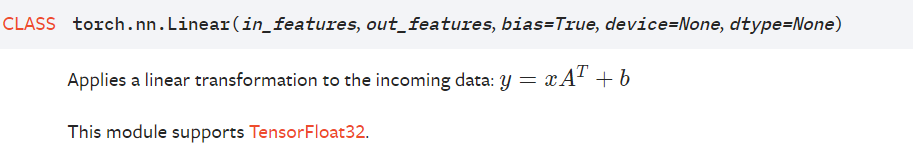

* <span class="girk">torch.mm()</span>
* torch.equal
* <span class="girk">torch.t()</span>

In [110]:
x = torch.randn(128, 20)     # input dim（128，20）
m = torch.nn.Linear(20, 30)  

In [117]:
# dir(m)
print(m.weight.size())
print(m.bias.size())

torch.Size([30, 20])
torch.Size([30])


In [118]:
output = m(x)
print(f"output.shape: {output.shape}")

output.shape: torch.Size([128, 30])


In [119]:
ans = torch.mm(x, m.weight.t()) + m.bias

<div class="burk">
* torch.equal(ans, output)</div><i class="fa fa-lightbulb-o "></i>

In [123]:
torch.equal(ans, output)

True

###  5.1.3. Pytorch: torch.flatten() & torch.flatten()

* torch.flatten(input, <span class="mark">start_dim=0</span>, end_dim=-1) → Tensor

* CLASS torch.nn<span class="burk">.F</span>latten(<span class="mark">start_dim=1</span>, end_dim=-1)  

In [129]:
x = torch.randn(2,4,2)
print(x,'\n', x.size(), '\n')
 
z = torch.flatten(x)
print(z, '\n', z.size(), '\n')
 
w = torch.flatten(x,1)
print(w, '\n', w.size(), '\n')

u = torch.flatten(x, 0, 1)
print(u, '\n', u.size(), '\n')

tensor([[[-0.4120,  0.2699],
         [-1.0787, -0.5242],
         [ 0.0323, -0.1513],
         [ 1.3634,  0.0103]],

        [[ 0.6252, -0.2464],
         [-0.5572,  0.3910],
         [-0.5937, -0.6944],
         [ 0.3164,  0.4768]]]) 
 torch.Size([2, 4, 2]) 

tensor([-0.4120,  0.2699, -1.0787, -0.5242,  0.0323, -0.1513,  1.3634,  0.0103,
         0.6252, -0.2464, -0.5572,  0.3910, -0.5937, -0.6944,  0.3164,  0.4768]) 
 torch.Size([16]) 

tensor([[-0.4120,  0.2699, -1.0787, -0.5242,  0.0323, -0.1513,  1.3634,  0.0103],
        [ 0.6252, -0.2464, -0.5572,  0.3910, -0.5937, -0.6944,  0.3164,  0.4768]]) 
 torch.Size([2, 8]) 

tensor([[-0.4120,  0.2699],
        [-1.0787, -0.5242],
        [ 0.0323, -0.1513],
        [ 1.3634,  0.0103],
        [ 0.6252, -0.2464],
        [-0.5572,  0.3910],
        [-0.5937, -0.6944],
        [ 0.3164,  0.4768]]) 
 torch.Size([8, 2]) 



In [130]:
x = torch.randn(32, 1, 5, 5)

model=torch.nn.Sequential(
    # # of input channel: 1，# of output channel: 6，kernel: 3*3, step: 1，padding=1
    torch.nn.Conv2d(1, 6, 3, 1, 1),
    torch.nn.Flatten()
)
output=model(x)
print(output.shape)  

torch.Size([32, 150])


* retain the <span class="burk">batch size</span> in dim 0

## 5.2. PyTorch: nn

* In TensorFlow, packages like <span class="mark">Keras, TensorFlow-Slim, and TFLearn provide higher-level abstractions</span> over raw computational graphs that are useful for building neural networks.

* <span class="mark">In PyTorch, the nn package serves this same purpose.</span> The nn package defines a set of Modules, which are roughly equivalent to neural network layers. 
* A <span class="girk">Module re</span>ceives input Tensors and computes output Tensors, but may also hold internal state such as Tensors containing learnable parameters. 
* The nn package also defines a set of useful loss functions that are commonly used when training neural networks.

In [6]:
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)
p = torch.tensor([1, 2, 3])

* <span class="burk">veiw</span> the device and dtype

In [11]:
print(x.device, x.dtype)

cpu torch.float32


In [7]:
print(x.size())
print(p.size())
print(x.unsqueeze(-1).size())

torch.Size([2000])
torch.Size([3])
torch.Size([2000, 1])


In [12]:
xx = x.unsqueeze(-1).pow(p)

* <span class="burk">holds internal Tensors</span> for its weight and bias.

In [13]:
# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

loss_fn = torch.nn.MSELoss(reduction='sum')

* <span class="mark">view parameters</span>
* <span class="mark">view modules</span>
* model.parameters() is a <span class="mark">generato</span>r
* model.modules() is a <span class="mark">generato</span>r

In [33]:
print(type(model.parameters()), "\n")

for parm in model.parameters():
    print(parm)
    
print("\n", model.modules)
print("\n", type(model.modules), "\n")

print("\n", model.modules())
print("\n", type(model.modules()), "\n")

for idx, m in enumerate(model.modules()):
    print(idx, ' ==> ', m)

<class 'generator'> 

Parameter containing:
tensor([[ 0.4011, -0.2193, -0.0740]], requires_grad=True)
Parameter containing:
tensor([-0.4549], requires_grad=True)

 <bound method Module.modules of Sequential(
  (0): Linear(in_features=3, out_features=1, bias=True)
  (1): Flatten(start_dim=0, end_dim=1)
)>

 <class 'method'> 


 <generator object Module.modules at 0x000002BBFDF78DD0>

 <class 'generator'> 

0  ==>  Sequential(
  (0): Linear(in_features=3, out_features=1, bias=True)
  (1): Flatten(start_dim=0, end_dim=1)
)
1  ==>  Linear(in_features=3, out_features=1, bias=True)
2  ==>  Flatten(start_dim=0, end_dim=1)


* model.\__getitem__\()  ==> modules  ===> <span class="burk">getitem()</span>
* bias and weight for the model

In [42]:
print(model[0])
print(model[1])
print(len(model))

Linear(in_features=3, out_features=1, bias=True)
Flatten(start_dim=0, end_dim=1)
2


In [52]:
model[0].bias
model[0].weight

Parameter containing:
tensor([[ 0.8496,  0.0022, -0.0923]], requires_grad=True)

* Module objects     # <span class="burk">override the __call__ operator</span> so you can call them like functions
* __call__ : Callable[..., Any] = <span class="mark">_call_impl   # at</span> site-packages/torch/nn/modules/module.py
* loss_fn = torch.nn.MSELoss(reduction='sum') ==> class MSELoss(_Loss)  ==> class _Loss(Module) ==>  def _call_impl(self, *input, **kwargs)
* <span class="girk">The same for the loss</span>

In [34]:
learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions.
    y_pred = model(xx)

    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

99 253.7008819580078
199 175.55442810058594
299 122.47462463378906
399 86.38082885742188
499 61.809967041015625
599 45.06437301635742
699 33.638916015625
799 25.83430290222168
899 20.49700164794922
999 16.84284019470215
1099 14.33807373046875
1199 12.61927604675293
1299 11.438451766967773
1399 10.626300811767578
1499 10.067109107971191
1599 9.681663513183594
1699 9.415681838989258
1799 9.231951713562012
1899 9.104901313781738
1999 9.016956329345703


In [35]:
# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

Result: y = -0.01275520958006382 + 0.8495594263076782 x + 0.002200484974309802 x^2 + -0.0923089012503624 x^3


In [46]:
linear_layer.weight

Parameter containing:
tensor([[ 0.8496,  0.0022, -0.0923]], requires_grad=True)

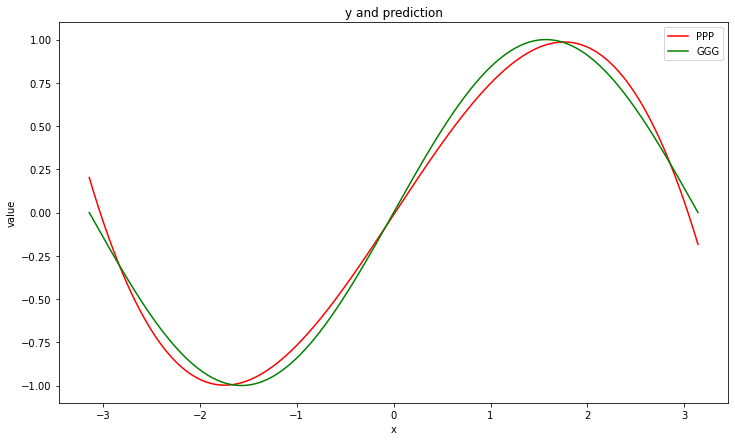

In [45]:
y_hat = y_pred.detach()
# y_hat = y_pred.detach().numpy()
plt.plot(x, y_hat, color='r', label='PPP')
plt.plot(x, y, color='g', label='GGG')
plt.xlabel("x")
plt.ylabel('value')
plt.title('y and prediction')
plt.legend()
plt.show()

## 5.3. PyTorch: optim

In [55]:
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

In [56]:
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

In [57]:
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

In [58]:
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

*  <span class="mark">model.zero_grad(</span>)
* <span class="girk">optimizer.zero_grad()</span> 

In [62]:
for t in range(2000):
    y_pred = model(xx)
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
#     model.zero_grad()         
    optimizer.zero_grad()           
    loss.backward()
    optimizer.step()

99 8.916780471801758
199 8.919659614562988
299 8.92230224609375
399 8.921076774597168
499 8.92019271850586
599 8.92068862915039
699 8.920981407165527
799 8.9207763671875
899 8.92068099975586
999 8.92076587677002
1099 8.920790672302246
1199 8.920770645141602
1299 8.920772552490234
1399 8.920772552490234
1499 8.920757293701172
1599 8.920755386352539
1699 8.920754432678223
1799 8.920753479003906
1899 8.920763969421387
1999 8.920769691467285


In [63]:
linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

Result: y = 0.0004999741213396192 + 0.8562408089637756 x + 0.0004999744123779237 x^2 + -0.0938303992152214 x^3


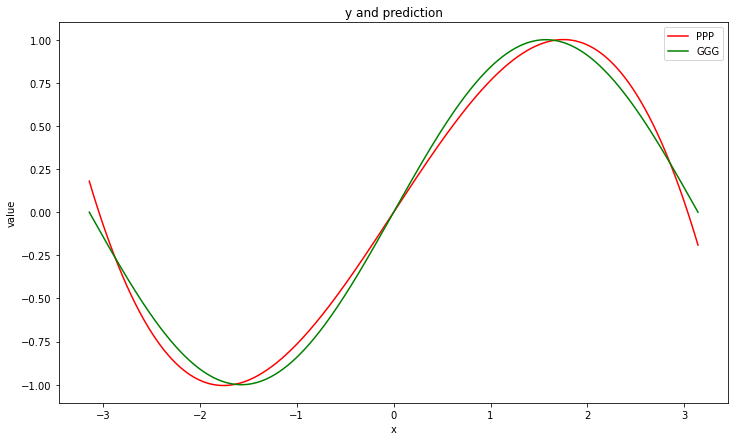

In [64]:
y_hat = y_pred.detach()
# y_hat = y_pred.detach().numpy()
plt.plot(x, y_hat, color='r', label='PPP')
plt.plot(x, y, color='g', label='GGG')
plt.xlabel("x")
plt.ylabel('value')
plt.title('y and prediction')
plt.legend()
plt.show()

## 5.4. PyTorch: Custom nn MOdules

### 5.4.1. CLASStorch.nn.parameter.Parameter(data=None, requires_grad=True)

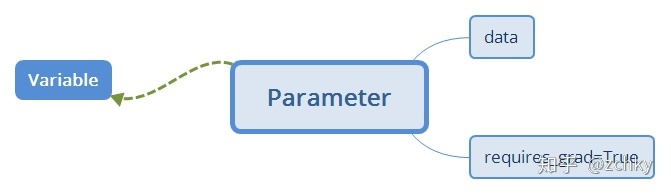

### 5.4.2. An example

In [3]:
class Polynomial3(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))     # requres_grad = True
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'

In [4]:
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

model = Polynomial3()

In [6]:
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)

In [7]:
for t in range(2000):
    y_pred = model(x)

    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

99 1044.2806396484375
199 719.207763671875
299 496.7493896484375
399 344.3316650390625
499 239.78343200683594
599 167.98849487304688
699 118.62983703613281
799 84.65814971923828
899 61.250919342041016
999 45.10525894165039
1099 33.956321716308594
1199 26.249780654907227
1299 20.91722869873047
1399 17.223628997802734
1499 14.662757873535156
1599 12.885542869567871
1699 11.651004791259766
1799 10.792685508728027
1899 10.195401191711426
1999 9.779437065124512
Result: y = 0.029489615932106972 + 0.8434804081916809 x + -0.005087447352707386 x^2 + -0.09144420176744461 x^3


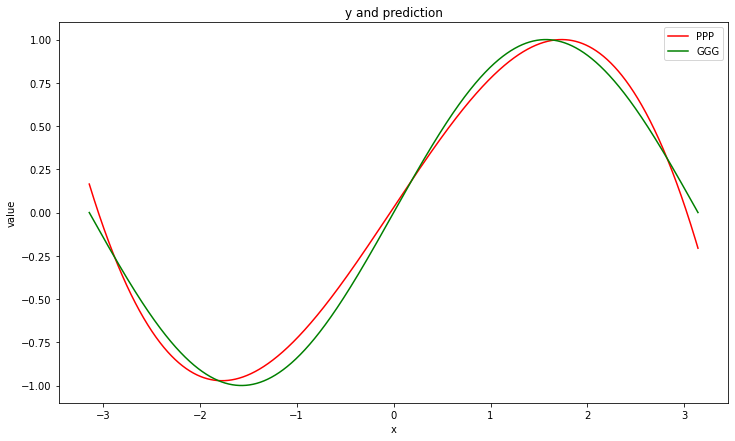

In [8]:
y_hat = y_pred.detach()
# y_hat = y_pred.detach().numpy()
plt.plot(x, y_hat, color='r', label='PPP')
plt.plot(x, y, color='g', label='GGG')
plt.xlabel("x")
plt.ylabel('value')
plt.title('y and prediction')
plt.legend()
plt.show()

## 5.5. PyTorch: Control Flow + Weight Sharing

In [9]:
import random

*   For the forward pass of the model, we randomly choose either 4, 5 and reuse the e parameter to compute the contribution of these orders.

*   Since each forward pass <span class="mark">builds a dynamic computation graph,</span> we can use normal Python control-flow operators like loops or conditional statements when defining the forward pass of the model.

In [10]:
class DynamicNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        self.e = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        y = self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3   ###  x**3/x**4/x**5/x**6
        for exp in range(4, random.randint(4, 6)):
            y = y + self.e * x ** exp
        return y

    def string(self):
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3 + {self.e.item()} x^4 ? + {self.e.item()} x^5 ?'

In [11]:
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

model = DynamicNet()

criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-8, momentum=0.9)
for t in range(30000):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    
    if t % 2000 == 1999:
        print(t, loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

1999 100.09536743164062
3999 66.48441314697266
5999 30.0958309173584
7999 19.371387481689453
9999 17.962121963500977
11999 11.23464298248291
13999 10.036043167114258
15999 10.642066955566406
17999 9.128440856933594
19999 8.98387622833252
21999 8.567420959472656
23999 8.638642311096191
25999 8.856093406677246
27999 8.840068817138672
29999 8.538253784179688
Result: y = -0.0013784787151962519 + 0.8581662774085999 x + -0.0003775831137318164 x^2 + -0.09390517324209213 x^3 + 0.0001277174160350114 x^4 ? + 0.0001277174160350114 x^5 ?


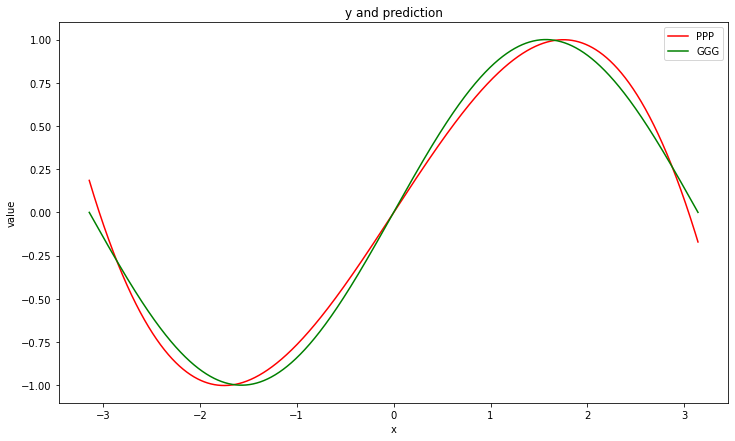

In [12]:
y_hat = y_pred.detach()
# y_hat = y_pred.detach().numpy()
plt.plot(x, y_hat, color='r', label='PPP')
plt.plot(x, y, color='g', label='GGG')
plt.xlabel("x")
plt.ylabel('value')
plt.title('y and prediction')
plt.legend()
plt.show()